In [268]:
using Plots

In [269]:
a = 1.5
eps = 0.2

0.2

In [270]:
N = 100
parent_x = [[]]

#=
for i in (1:N) #initialization
   push!(parent_x[1], rand()) 
end    
=#

parent_x[1] = [0.5 for _ in 1:N]
for i in 25:25
    parent_x[1][i] = rand()  # Add random noise to a small cluster
end

In [271]:
function f(x, a)
    return 1 - a*x*x
end

function canonical(xi, xipo, ximo, eps)
    return (1-eps)*f(xi,a) + (eps/2)*(f(xipo,a) + f(ximo,a))
end

function upd(x::Array)
    eps = 1.0
    y = zeros(Float64, N)
    for i in (1:N)
        if i==1
            y[i] = canonical(x[i], x[i+1], x[N], eps)
        elseif i==N
            y[i] = canonical(x[i], x[1], x[i-1], eps)
        else
            y[i] = canonical(x[i], x[i+1], x[i-1], eps)
        end
    end
    return y
end

upd (generic function with 1 method)

In [272]:
for i in (1:750)
    push!(parent_x, upd(parent_x[i]))
end

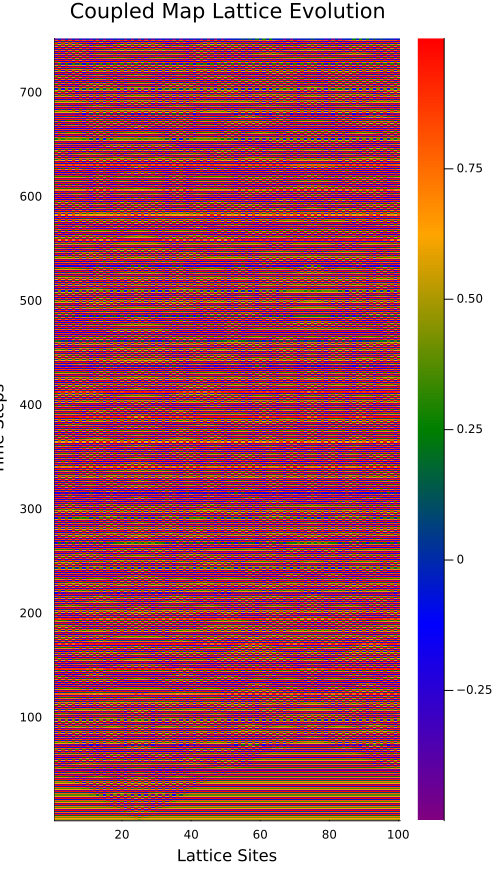

In [273]:
data = hcat(parent_x...)

heatmap(data', xlabel="Lattice Sites", ylabel="Time Steps", 
        color=:rainbow, title="Coupled Map Lattice Evolution",
        yflip=false,
        size=(500,880)
        )